# MNIST data set
For this notebook and dataset the methods NCC, NSC and NNC(KNN, with k=1) on the dataset MNIST, which is a dataset containing handwritten numbers

Preprocessing data for easier use later on

In [1]:
# Import libraries and data set
from libitmal import loader
import numpy as np
import pandas as pd


from time import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_openml
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import scipy.io as scip
import seaborn as sns
from sklearn.metrics import accuracy_score, jaccard_score




In [2]:
start = time()
X, y = fetch_openml('mnist_784', version=1 ,return_X_y=True)
t = time()-start

print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)
print('Time for fetching dataset: ', t)

Overall # of samples is 70000
Size of the features is: (70000, 784)
Time for fetching dataset:  27.840663194656372


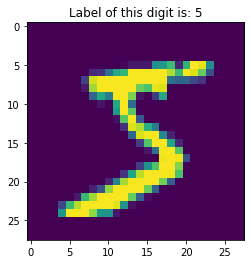

In [3]:
# function to display
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(28, 28)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
    plt.show()

show_digit(X[0], y[0])

In [4]:
# Splitting training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0) 

In [5]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

In [6]:
# show the sizes of each data split
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(X_test)))
print("testing data points: {}".format(len(y_test)))

training data points: 52500
validation data points: 17500
testing data points: 17500


Performing PCA(Principal Component analysis)

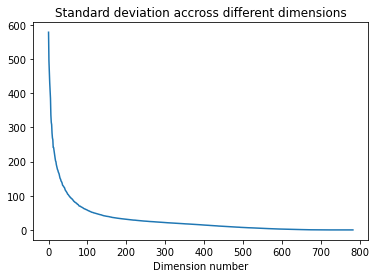

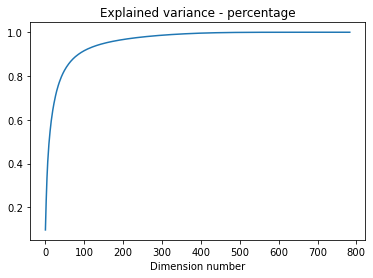

In [7]:
#Fitting PCA
pca = PCA().fit(X_train)

s1 = np.sqrt(pca.explained_variance_) # OBS: Relater til Dmat..
plt.plot(s1)
plt.title('Standard deviation accross different dimensions')
plt.xlabel('Dimension number')

#Plotting the explained Varriance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Explained variance - percentage')
plt.xlabel('Dimension number')

functionArray=(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

In [8]:
#Findind the optimal dimention
above95Indexes = np.where(functionArray>0.95)
dimension=above95Indexes[0][0]
print("The dimension corresponding to 95% explained varriance = ",dimension)

The dimension corresponding to 95% explained varriance =  153


In [9]:
# PCA fit
pca2 = PCA(n_components=dimension)
pca2.fit(X_train)

# principal componments
pc = pca2.components_

#### Explained varriance:
We now find the Explained varriance for each feature (feature is the same as dimention) and print them below. Explained variance is the proportion of the the varriance in the dataset which lies within the different features.

1.0

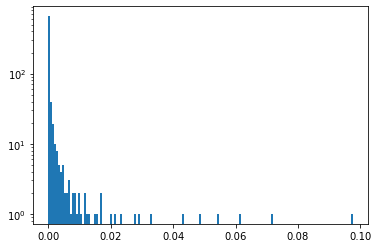

In [10]:
# Explained varriance:
explainedVarians = pca2.explained_variance_
plt.hist(pca.explained_variance_ratio_, bins=dimension, log=True)
pca.explained_variance_ratio_.sum()

#### Standart deviation:

Standart deviation is the deviation of the values compared to the mean value of the data. We here get the standart deviation of each of the features.

In [11]:
#Standart deviation
standartDeviation = np.sqrt(explainedVarians)
print("Standart deviation= \n", standartDeviation)

Standart deviation= 
 [578.50729997 495.60609354 460.32817861 431.37518149 408.5970893
 384.36697008 336.0691836  315.03376936 307.96440928 283.26874204
 269.21020021 264.25200706 241.51548298 241.20130878 232.60170927
 225.73371243 213.3767823  209.0697966  202.03979719 199.52046819
 191.34596737 185.95336672 181.25459288 176.67789424 174.71584274
 169.75826183 166.93107863 164.47866487 158.99640826 154.10488799
 149.8915624  148.54210277 143.65934087 141.74779152 139.8945799
 136.47512668 131.30210694 129.58798711 128.56074667 126.40149497
 124.73601782 123.66226497 119.94946962 116.69479064 114.72246034
 113.47152754 111.52153772 109.43648093 107.78107012 104.80437566
 104.05403677 102.76345246 100.69337659  99.25633671  98.30299205
  96.18704873  95.72382365  93.64465102  93.24419309  91.80369176
  90.74823064  90.35051298  88.65388727  87.11617762  85.46772025
  83.85414559  83.39769862  81.85239634  80.91377853  80.46801621
  80.02126896  78.41781514  77.75754731  77.10541694  75

#### Mean value:
The mean value is the mean of all datas in each feature.

In [12]:
# Mean values
mean = pca2.mean_
print('Mean = \n',mean)

Mean = 
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.90476190e-04 4.11428571e-03 4.11428571e-03 1.71428571e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.76190476e-04 1.50666667e-02 2.92190476e-02
 5.23047619e-02 6.69142857e-02 1.12038095e-01 1.56800000e-01
 1.80914286e-01 1.83942857e-01 2.06000000e-01 1.99009524e-01
 1.90857143e-01 1.53866667e-01 8.82285714e-02 4.69904762e-02
 3.93523810e-02 1.40952381e-02 4.93333333e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.47619048e-04
 4.62857143e-03 5.71428571e-03 5.16761905e-02 1.41466667e-01
 2.74057143e-01

In [13]:
#Fits and transforms the data to center it.
pcamnist=PCA(n_components=2)

MNIST_PCA_Train = pcamnist.fit_transform(X_train)
MNIST_PCA_Test = pcamnist.fit_transform(X_test)

df_train= pd.DataFrame(data=MNIST_PCA_Train, columns = ["PC1", "PC2"])
df_train['Cluster']= y_train

df_test= pd.DataFrame(data=MNIST_PCA_Test, columns = ["PC1", "PC2"])
df_test['Cluster']= y_test

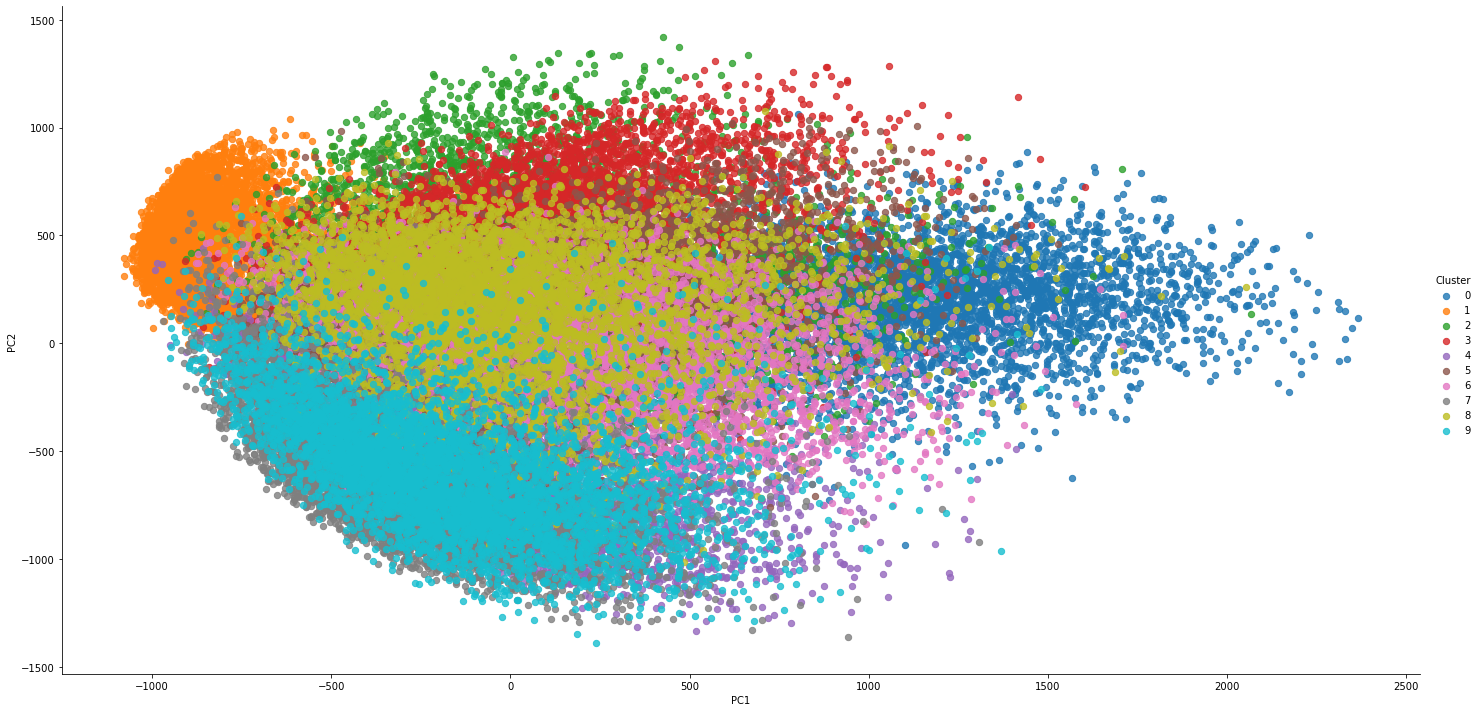

In [14]:
sns.lmplot( x="PC1", y="PC2",
  data=df_train, 
  fit_reg=False,
    aspect=2,
           height=10,
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 40}) # specify the point size

# Methods

## Nearest Centroid Classificer(NCC)
On regular data set

In [15]:
thresholds = [1.1, 0.8, 0.2]
start = time()

for k in thresholds:
    # Creating the Nearest Centroid Clissifier 
    model = NearestCentroid(shrink_threshold=k) 

    # Training the classifier 
    model.fit(X_train, y_train.ravel()) 
    # Printing Accuracy on Training and Test sets 
    print(f"Training Set Score : {model.score(X_train, y_train) * 100} % to threshold size: {k}" ) 
    print(f"Test Set Score : {model.score(X_test, y_test) * 100} % to threshold size: {k}") 
    print("")
    y_pred = model.predict(X_train)

t = time()-start
print("Time spend training and test:", t)

Training Set Score : 81.05904761904762 % to threshold size: 1.1
Test Set Score : 80.53142857142858 % to threshold size: 1.1

Training Set Score : 81.05333333333333 % to threshold size: 0.8
Test Set Score : 80.51428571428572 % to threshold size: 0.8

Training Set Score : 81.02285714285713 % to threshold size: 0.2
Test Set Score : 80.52571428571429 % to threshold size: 0.2

Time spend training and test: 4.041316270828247


On PCA data set

In [16]:
thresholds = [1.1, 0.8, 0.2]
PCAholder=[]
start = time()

for k in thresholds:
    # Creating the Nearest Centroid Clissifier 
    modelPCA = NearestCentroid(shrink_threshold=k) 

    # Training the classifier 
    modelPCA.fit(MNIST_PCA_Train, y_train.ravel()) 
    # Printing Accuracy on Training and Test sets 
    print(f"Training Set Score : {modelPCA.score(MNIST_PCA_Train, y_train) * 100} % to threshold size: {k}" ) 
    print(f"Test Set Score : {modelPCA.score(MNIST_PCA_Test, y_test) * 100} % to threshold size: {k}") 
    print("")
    PCAholder.append(modelPCA)
    y_predPCA = modelPCA.predict(MNIST_PCA_Train)
    
t = time()-start
print("Time spend training and test:", t)

Training Set Score : 42.95809523809524 % to threshold size: 1.1
Test Set Score : 16.04 % to threshold size: 1.1

Training Set Score : 43.03047619047619 % to threshold size: 0.8
Test Set Score : 16.034285714285716 % to threshold size: 0.8

Training Set Score : 43.06857142857143 % to threshold size: 0.2
Test Set Score : 16.0 % to threshold size: 0.2

Time spend training and test: 0.4834103584289551


## Nearest subclass centroid classifier(NSC)

Apply kmeans on the subclasses 2, 3, 5
then split
then scatter to show


In [17]:
list2 = []
list3 = []
list5 = []
newLabel2 = []
newLabel3 = []
newLabel5 = []
newdata2 = []
newdata3 = []
newdata5 = []


LabelsforClassify = [0,1,2,3,4,5,6,7,8,9]
LabelsforClassify2 = np.repeat(LabelsforClassify,2)
LabelsforClassify3 = np.repeat(LabelsforClassify,3)
LabelsforClassify5 = np.repeat(LabelsforClassify,5)


def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))


def NSC_Classify(xData, xlist, LabelsforClass):
    retlist=[]
    for y in xData:
        lastRecDist=0
        nlastRecLabel = 0
        for i in range(len(xlist)):
        #euclidean distance between list and samples
            smDistance= dist(xlist[i],y)
            if(lastRecDist>smDistance or lastRecDist==0):
                lastRecDist=smDistance
                nlastRecLabel=LabelsforClass[i]
        retlist.append(nlastRecLabel)
    return retlist

def NSC_score(y_pred, y_true):
    ammountOfSameSamples = np.where(y_true==y_pred)
    ammountOfSameSamples= np.array(ammountOfSameSamples)
    percentageSame = len(ammountOfSameSamples[0])/len(y_true)*100
    return percentageSame

In [18]:
y_train2 = y_train
y_train[:] = list(map(int,y_train))
y_test[:] = list(map(int,y_test))

In [19]:
start = time()
for x in range(0, 10, 1):
    g = X_train[y_train == x, :]
    gkmeans = KMeans(n_clusters=2).fit(g)
    list2.extend(gkmeans.cluster_centers_)
newLabel2 = NSC_Classify(X_test, list2, LabelsforClassify2)
newdata2 = NSC_Classify(X_train, list2, LabelsforClassify2)    

    
for x in range(0, 10, 1):
    g = X_train[y_train == x, :]
    gkmeans = KMeans(n_clusters=3).fit(g)
    list3.extend(gkmeans.cluster_centers_)
newLabel3 = NSC_Classify(X_test, list3, LabelsforClassify3)  
newdata3 = NSC_Classify(X_train, list3, LabelsforClassify3)    
    
    
for x in range(0, 10, 1):
    g = X_train[y_train == x, :]
    gkmeans = KMeans(n_clusters=5).fit(g)
    list5.extend(gkmeans.cluster_centers_)
newLabel5 = NSC_Classify(X_test, list5, LabelsforClassify5) 
newdata5 = NSC_Classify(X_train, list5, LabelsforClassify5)   
t = time()-start
print("Time spend training and test:", t)    

Time spend training and test: 189.4473032951355


In [20]:
# print(newLabel2)
# print("space")
# print(y_test)

In [21]:
# Printing Accuracy on Training and Test sets 

print(f"Training Set Score : {NSC_score(newdata2, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel2, y_test)} %") 
print("")

print(f"Training Set Score : {NSC_score(newdata3, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel3, y_test)} %") 
print("")

print(f"Training Set Score : {NSC_score(newdata5, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel5, y_test)} %") 
print("")


Training Set Score : 85.69142857142857 % 
Test Set Score : 85.01714285714286 %

Training Set Score : 87.88952380952381 % 
Test Set Score : 87.21142857142857 %

Training Set Score : 90.36 % 
Test Set Score : 89.72 %



Applying on PCA dataset

In [23]:
list2 = []
list3 = []
list5 = []
newLabel2 = []
newLabel3 = []
newLabel5 = []
newdata2 = []
newdata3 = []
newdata5 = []

start = time()
for x in range(0, 10, 1):
    g = MNIST_PCA_Train[y_train == x, :]
    gkmeans = KMeans(n_clusters=2, random_state=42).fit(g)
    list2.extend(gkmeans.cluster_centers_)
newLabel2 = NSC_Classify(MNIST_PCA_Test, list2, LabelsforClassify2)
newdata2 = NSC_Classify(MNIST_PCA_Train, list2, LabelsforClassify2)    

    
for x in range(0, 10, 1):
    g = MNIST_PCA_Train[y_train == x, :]
    gkmeans = KMeans(n_clusters=3, random_state=42).fit(g)
    list3.extend(gkmeans.cluster_centers_)
newLabel3 = NSC_Classify(MNIST_PCA_Test, list3, LabelsforClassify3)  
newdata3 = NSC_Classify(MNIST_PCA_Train, list3, LabelsforClassify3)   
    
    
for x in range(0, 10, 1):
    g = MNIST_PCA_Train[y_train == x, :]
    gkmeans = KMeans(n_clusters=5, random_state=42).fit(g)
    list5.extend(gkmeans.cluster_centers_)
newLabel5 = NSC_Classify(MNIST_PCA_Test, list5, LabelsforClassify5) 
newdata5 = NSC_Classify(MNIST_PCA_Train, list5, LabelsforClassify5)   
t = time()-start
print("Time spend training and test:", t)    
    

Time spend training and test: 118.5589759349823


In [24]:
# Printing Accuracy on Training and Test sets 

print(f"Training Set Score : {NSC_score(newdata2, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel2, y_test)} %") 
print("")

print(f"Training Set Score : {NSC_score(newdata3, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel3, y_test)} %") 
print("")

print(f"Training Set Score : {NSC_score(newdata5, y_train)} % " ) 
print(f"Test Set Score : {NSC_score(newLabel5, y_test)} %") 
print("")


Training Set Score : 42.266666666666666 % 
Test Set Score : 12.394285714285715 %

Training Set Score : 42.19047619047619 % 
Test Set Score : 11.165714285714285 %

Training Set Score : 40.85333333333334 % 
Test Set Score : 11.085714285714285 %



## Nearest Neighbour classifier(KNN with k=1)
While the assignment only stated to perform Nearest neighbour classifier, a test for different variations of k for the nearest neighbour classifier was performed to see how each k performed

In [ ]:
kVals = range(1, 10, 2)
accuracies = []
start = time() 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 10, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train, y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(X_test, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

t = time()-start
print("Time spend training and test:", t)

KNN on PCA data set

In [ ]:
kVals = range(1, 10, 2)
accuracies_PCA = []
start = time() 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 10, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	modelPCA = KNeighborsClassifier(n_neighbors=k)
	modelPCA.fit(MNIST_PCA_Train, y_train)
 
	# evaluate the model and update the accuracies list
	scorePCA = modelPCA.score(MNIST_PCA_Test, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, scorePCA * 100))
	accuracies_PCA.append(scorePCA)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies_PCA))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies_PCA[i] * 100))

t = time()-start
print("Time spend training and test:", t)